In [11]:
from pyspark import SparkContext
import matplotlib.pyplot as plt
import time

In [12]:
sc = SparkContext("local", "count app")

In [13]:
# Load a text file
text_file = sc.textFile("data/divine_comedy.txt")

In [14]:
# Calculate the total number of words
num_words = text_file.flatMap(lambda line: line.split(" ")).count()
print(f"The file has {num_words} words.")

# Use the count action to get the number of lines
num_lines = text_file.count()
print(f"The file has {num_lines} lines.")

# Calculate the average number of words per line
avg_words_per_line = num_words / num_lines
print(f"The average number of words per line is {avg_words_per_line}.")

The file has 113396 words.
The file has 15992 lines.
The average number of words per line is 7.09079539769885.


In [15]:
# FlatMap transformation to split the lines into words
words = text_file.flatMap(lambda line: line.split(" "))

In [16]:
# Map transformation to create a pair for each word,
# and ReduceByKey transformation to count the occurrences
word_counts = words.map(
    lambda word: (word, 1)
).reduceByKey(lambda a,b:a +b)

In [17]:
# Collect action to bring the data back to the driver program as a list
output = word_counts.collect()

for (word, count) in output:
    print(f"{word}: {count}")


The: 915
Project: 79
Gutenberg: 22
eBook: 6
of: 2024
Divine: 2
Comedy,: 1
by: 439
Dante: 2
Alighieri: 2
: 1717
This: 106
is: 532
for: 553
the: 4737
use: 25
anyone: 4
anywhere: 2
in: 1460
United: 15
States: 7
and: 2315
most: 60
other: 221
parts: 10
world: 72
at: 345
no: 217
cost: 5
with: 952
almost: 5
restrictions: 2
whatsoever.: 2
You: 13
may: 195
copy: 8
it,: 61
give: 30
it: 475
away: 14
or: 283
re-use: 2
under: 26
terms: 26
License: 8
included: 2
this: 417
online: 4
www.gutenberg.org.: 2
If: 134
you: 96
are: 190
not: 622
located: 7
States,: 4
will: 160
have: 232
to: 1939
check: 5
laws: 15
country: 6
where: 169
before: 90
using: 7
eBook.: 2
Title:: 1
Comedy: 1
Vision: 1
Hell,: 1
Purgatory: 3
Paradise: 5
Author:: 1
Translator:: 1
Rev.: 1
H.: 2
F.: 2
Cary: 1
Illustrator:: 1
Gustave: 2
Doré: 2
Release: 1
Date:: 1
September,: 2
2005: 1
[eBook: 1
#8800]: 1
[Most: 1
recently: 1
updated:: 1
January: 2
14,: 1
2023]: 1
Language:: 1
English: 2
Produced: 1
by:: 1
David: 3
Widger: 1
***: 4
START:

In [18]:
# Use the takeOrdered action to get the 10 most common words
top10 = word_counts.takeOrdered(10, key=lambda x: -x[1])

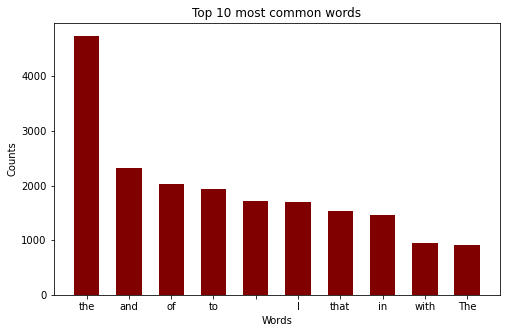

In [20]:
# Separate the words and counts into two lists
words = [i[0] for i in top10]
counts = [i[1] for i in top10]

# Plot the histogram
plt.figure(figsize=(8,5))
plt.bar(words, counts, color ='maroon', width = 0.6)

plt.xlabel("Words") 
plt.ylabel("Counts") 
plt.title("Top 10 most common words") 
plt.show()

In [21]:
sc.stop()